# Лабораторная работа №1
Датасет: самые популярные игры платформы Steam

## Импортирование необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from pathlib import Path

## Некоторые дополнительные функции

In [2]:
def data_to_int(raw_data: pd.DataFrame, columns: list):
    for column in columns:
        raw_data[column] = raw_data[column].astype(int)

def remove_commas(raw_data: pd.DataFrame, columns: list):
    for column in columns:
        raw_data[column] = raw_data[column].apply(lambda i: ''.join(i.split(",")))

## Открытие файла с данными

In [3]:
file_name = 'data.csv'
file_path = f'{Path(os.getcwd()).parent}//data//{file_name}'
data = pd.read_csv(file_path)

remove_commas(data, ["Current", "All_time peak", "24th Peak"])
data_to_int(data, ["No.", "Current", "All_time peak", "24th Peak"])

print(data)

       No.                              Name  Current  24th Peak  \
0        1  Counter-Strike: Global Offensive   785506    1167926   
1        2                            Dota 2   356601     586637   
2        3                      Apex Legends   314210     591660   
3        4               PUBG: BATTLEGROUNDS   240021     452174   
4        5                   Hogwarts Legacy   228129     474914   
...    ...                               ...      ...        ...   
4995  4996                           McPixel        0          6   
4996  4997                       Cerdocornio        0          1   
4997  4998                          Anoxemia        0          1   
4998  4999                     Strange Night        0          3   
4999  5000                           IACTURA        0          1   

      All_time peak  
0           1320219  
1           1295114  
2            610433  
3           3257248  
4            879308  
...             ...  
4995           2311  
4996   

## Построение графиков

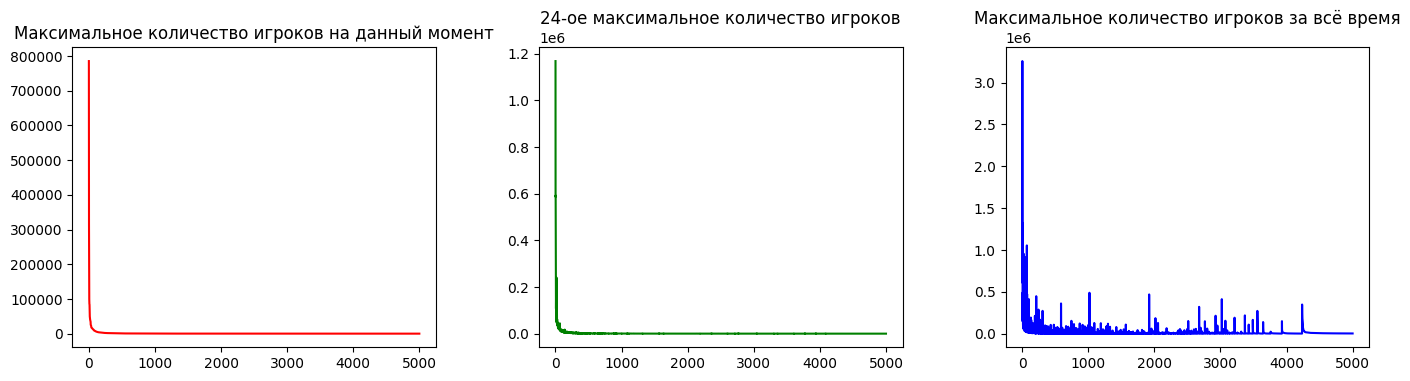

In [4]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].plot(
    data["No."],
    data["Current"],
    color="Red",
    label='За всё время'
)
axis[0].set_title('Максимальное количество игроков на данный момент')

axis[1].plot(
    data["No."],
    data["24th Peak"],
    color="Green",
    label='24 Пик'
)
axis[1].set_title('24-ое максимальное количество игроков')

axis[2].plot(
    data["No."],
    data["All_time peak"],
    color="Blue",
    label='За всё время'
)
axis[2].set_title('Максимальное количество игроков за всё время')

plt.tight_layout(pad=5)
plt.show()

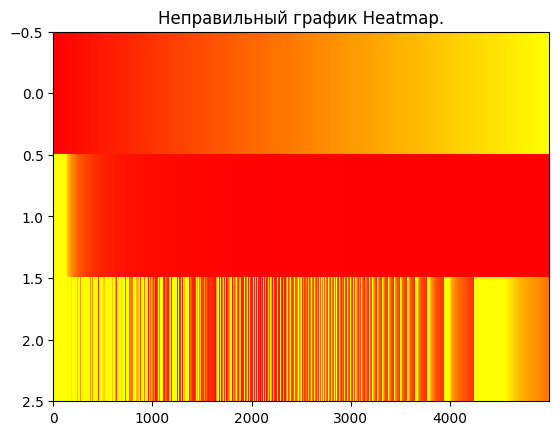

In [5]:
plt.title("Неправильный график Heatmap.")

plt.imshow(
    X=[data["No."], data["Current"], data["All_time peak"]],
    interpolation="nearest",
    aspect='auto',
    cmap='autumn',
    norm=colors.Normalize(data["No."].min(), data["No."].max())
)

plt.show()

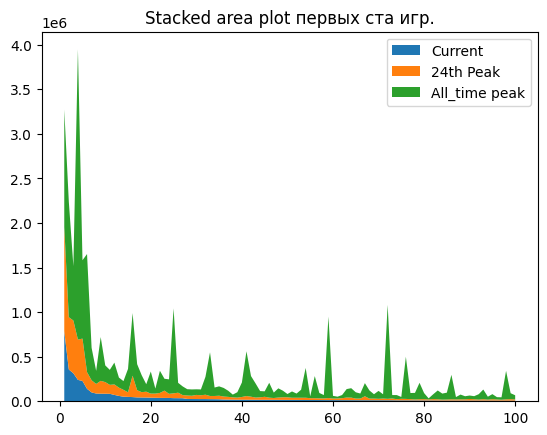

In [6]:
plt.title("Stacked area plot первых ста игр.")

plt.stackplot(data["No."][:100],
              data["Current"][:100],
              data["24th Peak"][:100],
              data["All_time peak"][:100],
              labels=["Current", "24th Peak", 'All_time peak'])
plt.legend(loc='upper right')

plt.show()

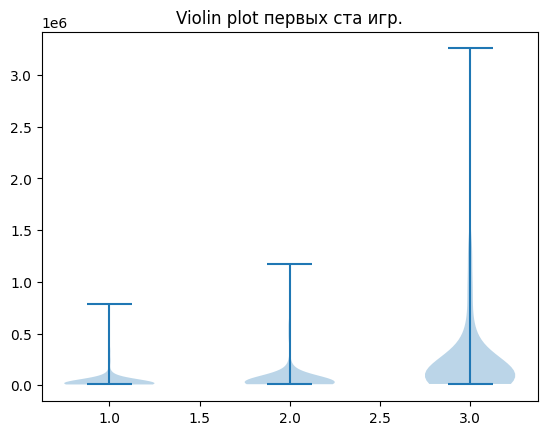

In [7]:
plt.title("Violin plot первых ста игр.")

plt.violinplot([data["Current"][:100],
                data["24th Peak"][:100],
                data["All_time peak"][:100],
                ])

plt.show()

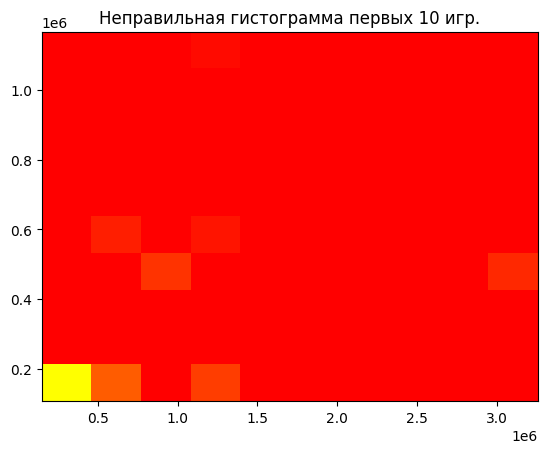

In [8]:
plt.title("Неправильная гистограмма первых 10 игр.")

plt.hist2d(
    x=data["All_time peak"][:10],
    y=data["24th Peak"][:10],
    weights=data["No."][:10],
    cmap='autumn',
)

plt.show()

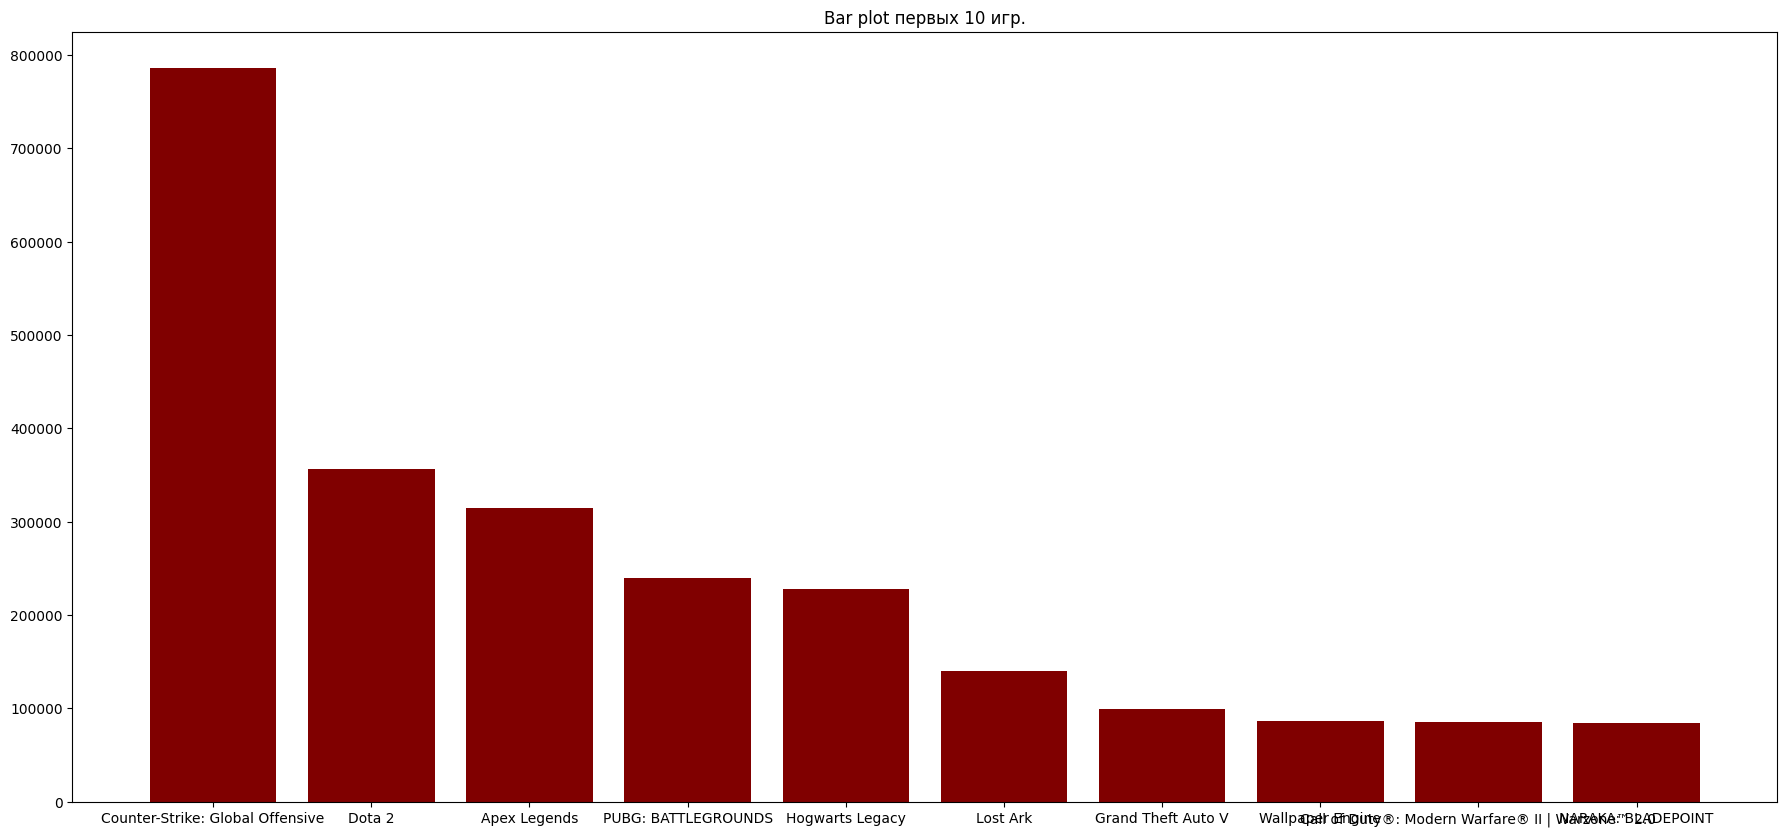

In [10]:
plt.title("Bar plot первых 10 игр.")

plt.bar(
    data["Name"][:10],
    data["Current"][:10],
    color='maroon',
)

fig = plt.gcf()
fig.set_size_inches(22, 10)
fig.savefig('test2png.png', dpi=100)

plt.show()

# Вывод
Количество игроков в самых популярных играх стремится к нулю по экспоненте, по принципу Парета 80% игроков сконцентрированы в первых 20% играх.